<h1> <center> Isofotas de dos galaxias </center></h1>
<h2> <center> Santiago Lastra Ramírez </center></h2>

Notebook creado para crear las isofotas de dos galaxias, M87 y M100

In [2]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from photutils.isophote import Ellipse
from photutils.isophote import IsophoteList
from photutils import EllipticalAperture
import numpy as np
from scipy.optimize import curve_fit

<h3> Se leen las imagenes de las dos galaxias y se plotean </h3>

In [3]:
'''
M87
'''

image_file = get_pkg_data_filename('M87.fits')
image_dataM87 = fits.getdata(image_file, ext=0)

'''
M100
'''

image_file = get_pkg_data_filename('M100.fits')
image_dataM100 = fits.getdata(image_file, ext=0)


[]

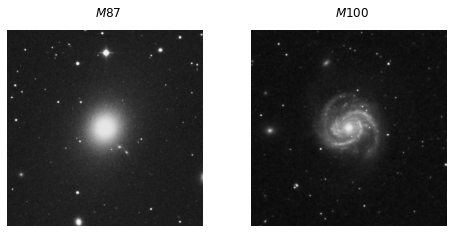

In [4]:
fig, axs = plt.subplots(1,2,figsize=(8, 8))
axs[0].imshow(image_dataM87, cmap="gray")
axs[0].set_title("$M87$")
axs[0].axis('off')
axs[0].axis([0,550,0,550])

axs[1].imshow(image_dataM100, cmap="gray")
axs[1].set_title("$M100$")
axs[1].axis('off')
axs[1].axis([0,550,0,550])

#plt.savefig("Galaxias.png",dpi=400)
plt.plot()

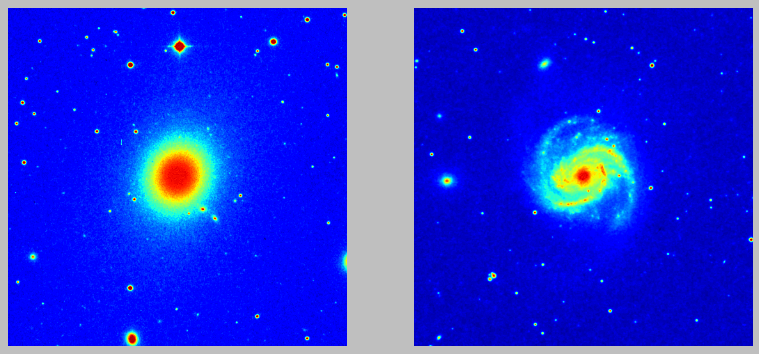

In [5]:
plt.style.use('classic')
dataM87=image_dataM87
dataM100=image_dataM100
fig, axs = plt.subplots(1,2,figsize=(12, 12))

axs[0].imshow(dataM87, origin='lower')
axs[0].axis('off')
axs[1].imshow(dataM100, origin='lower')
axs[1].axis('off')

#aper0.plot(color='white',linewidth=2)
plt.show()

<h3> Se imprimen las curvas de luz de la galaxia</h3>

In [6]:
ellipse = Ellipse(dataM87)
isolistM87 = ellipse.fit_image(sma0=50)

ellipse = Ellipse(dataM100)
isolistM100 = ellipse.fit_image(sma0=100)

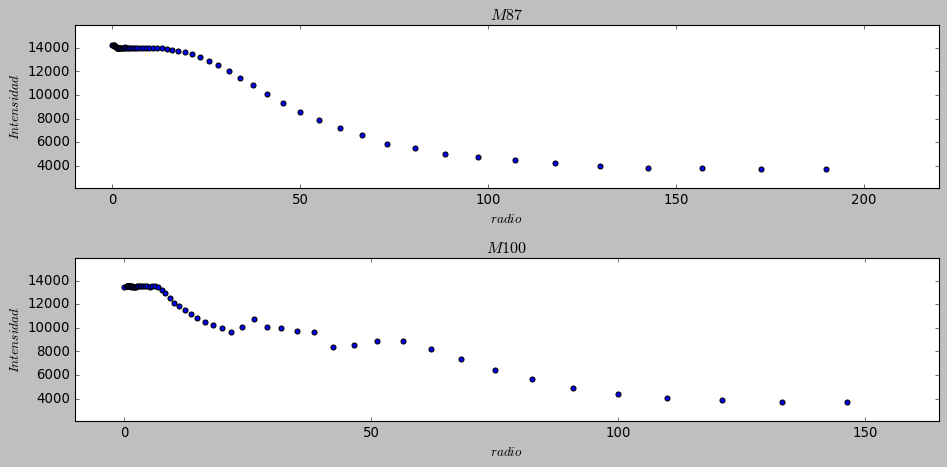

In [7]:
fig, axs = plt.subplots(2,figsize=(12, 6))
plt.rcParams['image.origin'] = 'lower'

axs[0].scatter(isolistM87.sma,isolistM87.intens)
axs[0].set_title("$M87$")
axs[0].set_xlabel('$radio$')
axs[0].set_ylabel('$Intensidad$')
axs[0].axis([-10,220,2100,15900])

axs[1].scatter(isolistM100.sma,isolistM100.intens)
axs[1].set_title("$M100$")
axs[1].set_xlabel('$radio$')
axs[1].set_ylabel('$Intensidad$')
axs[1].axis([-10,165,2100,15900])

fig.tight_layout()
#plt.savefig("Curvas.png",dpi=400)
plt.show()

<h3>Se crean curvas de Sersic o de Vaucoulers</h3>

/tmp/ipykernel_10951/1908731237.py:5: RuntimeWarning: invalid value encountered in power
  return I_0*np.exp(-b*(x/R_0)**(1/4))


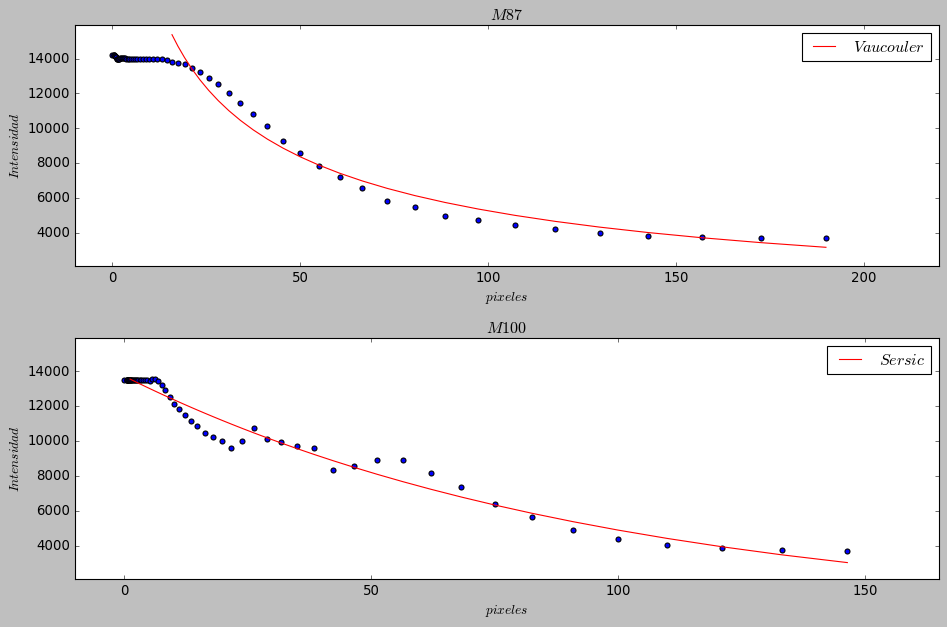

In [8]:
def sersic(x,I_0,b,R_0):
    return I_0 * np.exp(-b*(x/R_0)**(1))  

def vaucouler(x,I_0,b,R_0):
    return I_0*np.exp(-b*(x/R_0)**(1/4))  


fig, axs = plt.subplots(2,figsize=(12, 8))
plt.rcParams['image.origin'] = 'lower'

b=37
a=10
poptM87, pcov = curve_fit(vaucouler, isolistM87.sma[b:], isolistM87.intens[b:])
poptM100, pcov = curve_fit(sersic, isolistM100.sma[a:], isolistM100.intens[a:])

axs[0].scatter(isolistM87.sma,isolistM87.intens)
axs[0].plot(isolistM87.sma[b:], vaucouler(isolistM87.sma[b:], *poptM87),color="r",label="$Vaucouler$")
axs[0].set_title("$M87$")
axs[0].set_xlabel('$pixeles$')
axs[0].set_ylabel('$Intensidad$')
axs[0].axis([-10,220,2100,15900])

axs[1].scatter(isolistM100.sma,isolistM100.intens)
axs[1].plot(isolistM100.sma[a:], sersic(isolistM100.sma[a:], *poptM100),color="r",label="$Sersic$")
axs[1].set_title("$M100$")
axs[1].set_xlabel('$pixeles$')
axs[1].set_ylabel('$Intensidad$')
axs[1].axis([-10,165,2100,15900])

axs[0].legend()
axs[1].legend()
fig.tight_layout()
#plt.savefig("Curvas.png",dpi=400)
plt.show()

In [8]:
print("La instensidad a R=0 para M87 es",poptM87[0],"y para M100 es",poptM100[0],"\nEl radio para M87 es",
      poptM87[2],"y para M100",poptM100[2])

La instensidad a R=0 para M87 es 20060.217648239497 y para M100 es 13694.772729964243 
El radio para M87 es 0.15912887443397536 y para M100 65.64035300776132


<h3>Se imprimen las isofotas en las imágenes</h3>

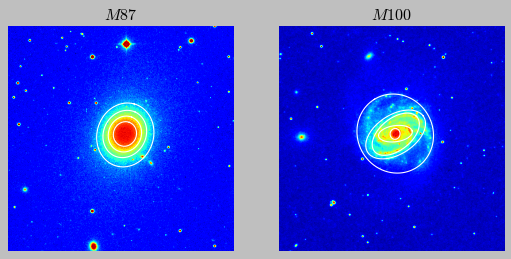

In [10]:
fig, ax = plt.subplots(1,2,figsize=(8, 8))

ax[0].imshow(dataM87, origin='lower')
ax[0].axis([0, 511, 0, 511])
ax[0].axis('off')
ax[0].set_title("$M87$")

isos = []
smas = [29, 40. ,53., 73.]
for sma in smas:
    iso = isolistM87.get_closest(sma)
    isos.append(iso)
    x, y, = iso.sampled_coordinates()
    ax[0].plot(x, y, color='white',linewidth=1)
    
ax[1].imshow(dataM100, origin='lower')
ax[1].axis([0, 511, 0, 511])
ax[1].axis('off')
ax[1].set_title("$M100$")

isos = []
smas = [86.8,75.,60.,40.4,12.]
for sma in smas:
    iso = isolistM100.get_closest(sma)
    isos.append(iso)
    x, y, = iso.sampled_coordinates()
    ax[1].plot(x, y, color='white',linewidth=1)
    
#plt.savefig("Isofotas.png",dpi=400)
plt.show()

<h3> Parámetros A3 y A4</h3>

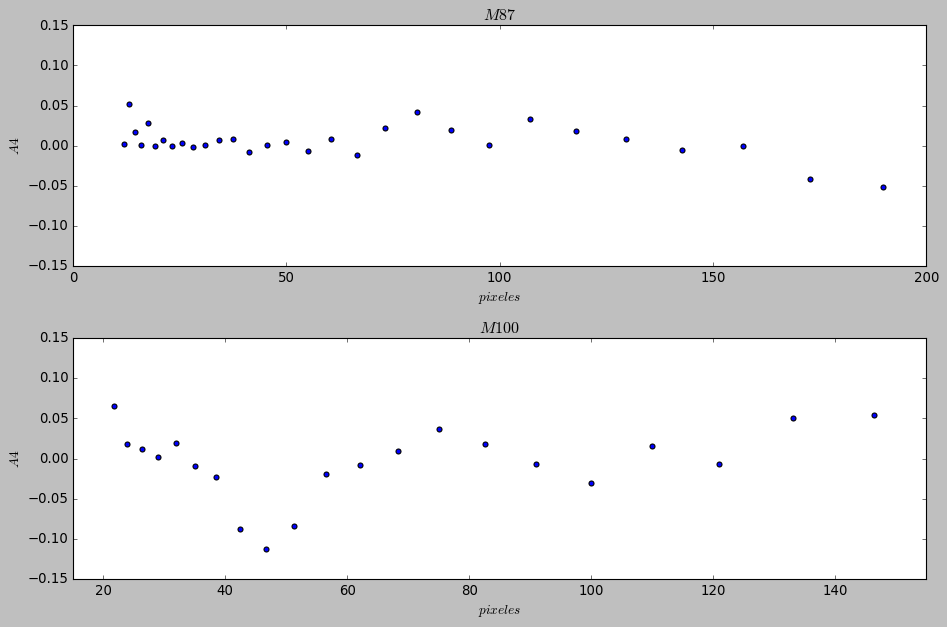

In [9]:
dfM87=isolistM87.to_table(columns="all").to_pandas()
dfM100=isolistM100.to_table(columns="all").to_pandas()

# A4
fig, axs = plt.subplots(2,figsize=(12, 8))
plt.rcParams['image.origin'] = 'lower'

a=34
b=40

axs[0].scatter(dfM87.sma[a:],dfM87.a4[a:])
axs[0].set_title("$M87$")
axs[0].set_xlabel('$pixeles$')
axs[0].set_ylabel('$A4$')
axs[0].axis([0,200,-0.15,0.15])

axs[1].scatter(dfM100.sma[b:],dfM100.a4[b:])
axs[1].set_title("$M100$")
axs[1].set_xlabel('$pixeles$')
axs[1].set_ylabel('$A4$')
axs[1].axis([15,155,-0.15,0.15])

fig.tight_layout()
#plt.savefig("A4.png",dpi=400)
plt.show()


<h3> Elipticidad de las isofotas en función del radio</h3>

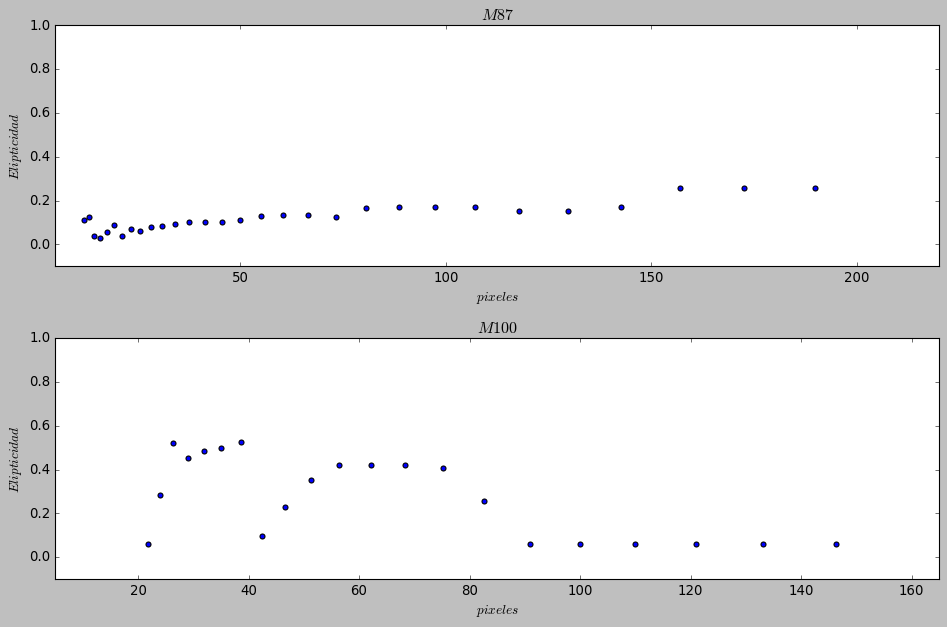

In [47]:
fig, axs = plt.subplots(2,figsize=(12, 8))
plt.rcParams['image.origin'] = 'lower'

a=34
b=40

axs[0].scatter(dfM87.sma[a:],dfM87.ellipticity[a:])
axs[0].set_title("$M87$")
axs[0].set_xlabel('$pixeles$')
axs[0].set_ylabel('$Elipticidad$')
axs[0].axis([5,220,-0.1,1])

axs[1].scatter(dfM100.sma[b:],dfM100.ellipticity[b:])
axs[1].set_title("$M100$")
axs[1].set_xlabel('$pixeles$')
axs[1].set_ylabel('$Elipticidad$')
axs[1].axis([5,165,-0.1,1])

fig.tight_layout()
#plt.savefig("Elipticidad.png",dpi=400)
plt.show()

<h2>Ya habiendo obtenido la elipticidad se halla la inclinación de la galaxia </h2>

In [41]:
c=max(dfM100.ellipticity[b:])
i=np.arccos((((1-dfM100.ellipticity)**2-(1-c)**2)/(1-(1-c)**2))**(1/2)).drop(46)
print("La inclinación de M100 es de",np.mean(i*180/np.pi),"grados")

La inclinación de M100 es de 34.28592077012333 grados
